In [28]:
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

results_path = "../results"

dfs = []

for file_path in glob(os.path.join(results_path, "*average_results.csv")):
    file_name = os.path.basename(file_path)
    df = pd.read_csv(file_path, index_col=0)
    df['Source_File'] = file_name
    columns = ['Source_File'] + [col for col in df.columns if col != 'Source_File']
    df = df[columns]
    dfs.append(df)


all_models_results = pd.concat(dfs, ignore_index=True)


In [29]:
best_models_files = [
    "20241203_2115_lr_average_results.csv",
    "20241203_2115_knn_average_results.csv",
    "20241203_2138_rf_average_results.csv",
    "20241203_2255_lr_average_results.csv"
]

filtered_results = all_models_results[
    all_models_results['Source_File'].isin(best_models_files)
]

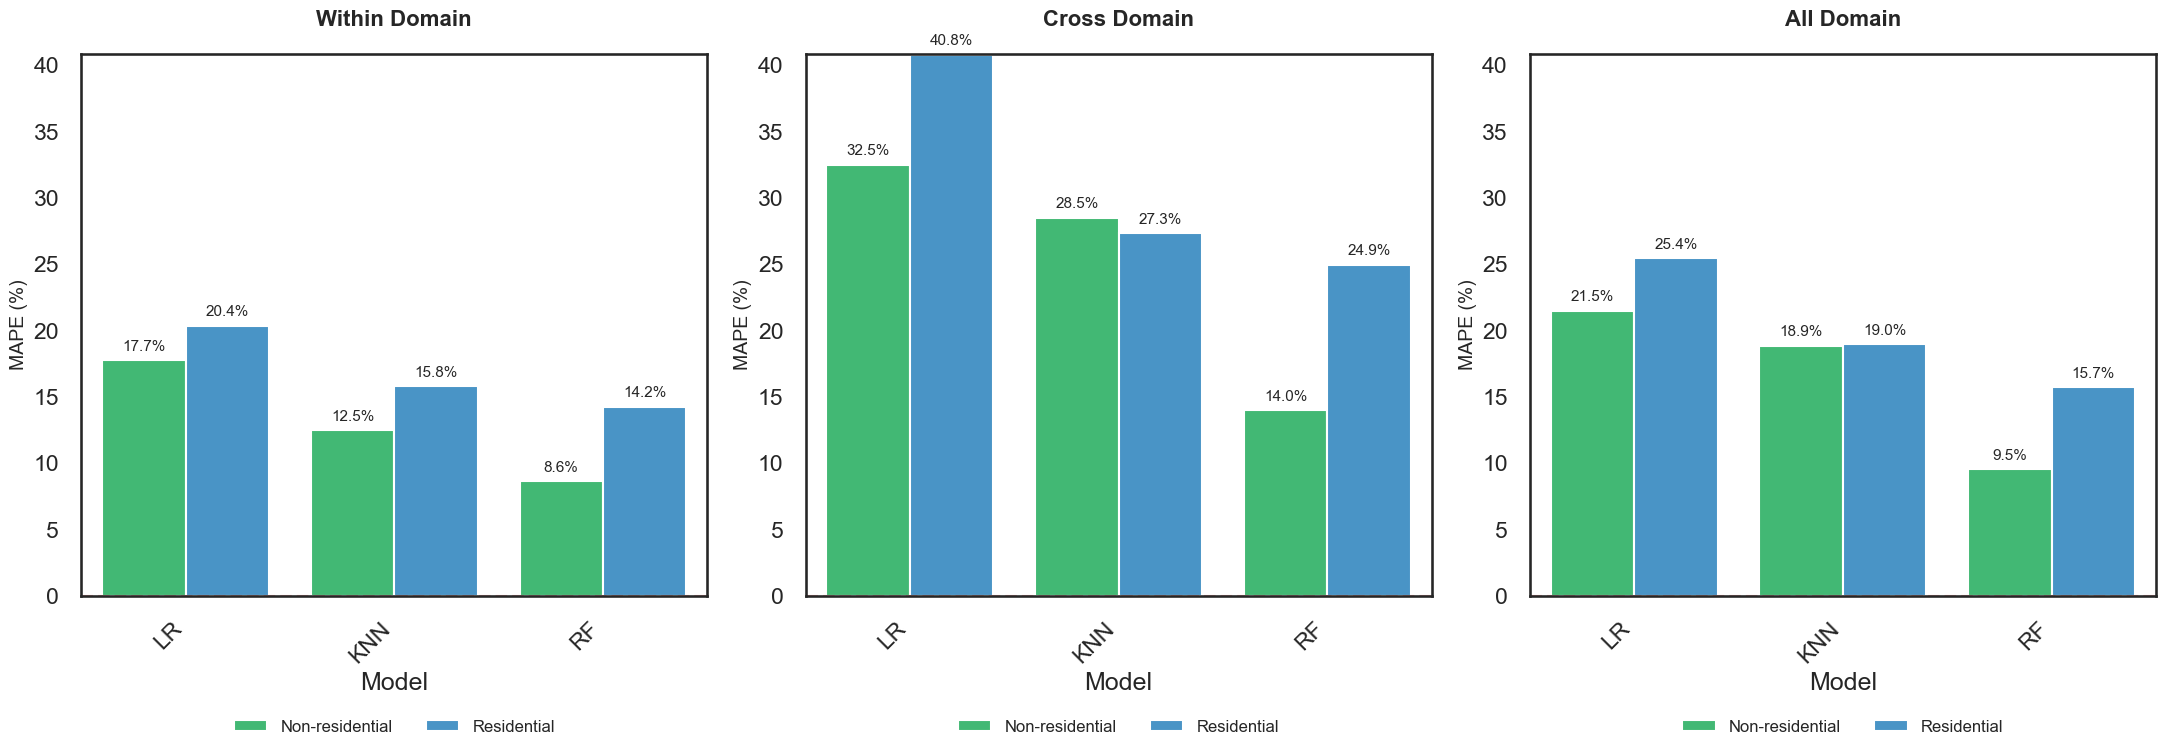

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

strategy_names = {
    'within_domain': 'Within Domain',
    'cross_domain': 'Cross Domain',
    'all_domain': 'All Domain'
}

model_names = {
    'LinearRegression': 'LR',
    'KNeighborsRegressor': 'KNN',
    'RandomForestRegressor': 'RF'
}

target_names = {
    'Non-residential EUI (kWh/m2/year)': 'Non-residential',
    'Residential EUI (kWh/m2/year)': 'Residential'
}

custom_palette = {
    'Non-residential': '#2ecc71',
    'Residential': '#3498db'
}

fig, axes = plt.subplots(1, 3, figsize=(22, 8))  # Mayor espacio entre gráficos

strategies = ['within_domain', 'cross_domain', 'all_domain']

# Calculando los límites dinámicos basados en los valores de MAPE
min_mape = filtered_results['MAPE'].min()
max_mape = filtered_results['MAPE'].max()

# Estableciendo el límite inferior y superior de forma más flexible
y_min = min(min_mape - 0.1, 0)  # Evitar que sea menor que 0
y_max = max(max_mape + 0.1, max_mape)  # Evitar que sea innecesariamente 100

for ax, strategy in zip(axes, strategies):
    strategy_results = filtered_results[filtered_results['Strategy'] == strategy].copy()
    strategy_results['Model'] = strategy_results['Model'].map(model_names)
    strategy_results['Target'] = strategy_results['Target'].map(target_names)

    bars = sns.barplot(
        data=strategy_results, 
        x='Model', 
        y='MAPE', 
        hue='Target', 
        palette=custom_palette,
        ax=ax
    )
    
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%', padding=5, fontsize=11)  # Ajustar etiquetas con precisión

    ax.set_title(f'{strategy_names[strategy]}', 
                 fontsize=16,
                 pad=20,
                 fontweight='bold')
    ax.set_ylabel('MAPE (%)', fontsize=14)

    ax.set_ylim(y_min, y_max)

    ax.axhline(y=0, color='red', linestyle='--', alpha=0.3)

    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Etiquetas del eje X inclinadas

    ax.legend(bbox_to_anchor=(0.5, -0.2),
              loc='upper center',
              ncol=2,
              fontsize=12)

plt.tight_layout()
plt.show()


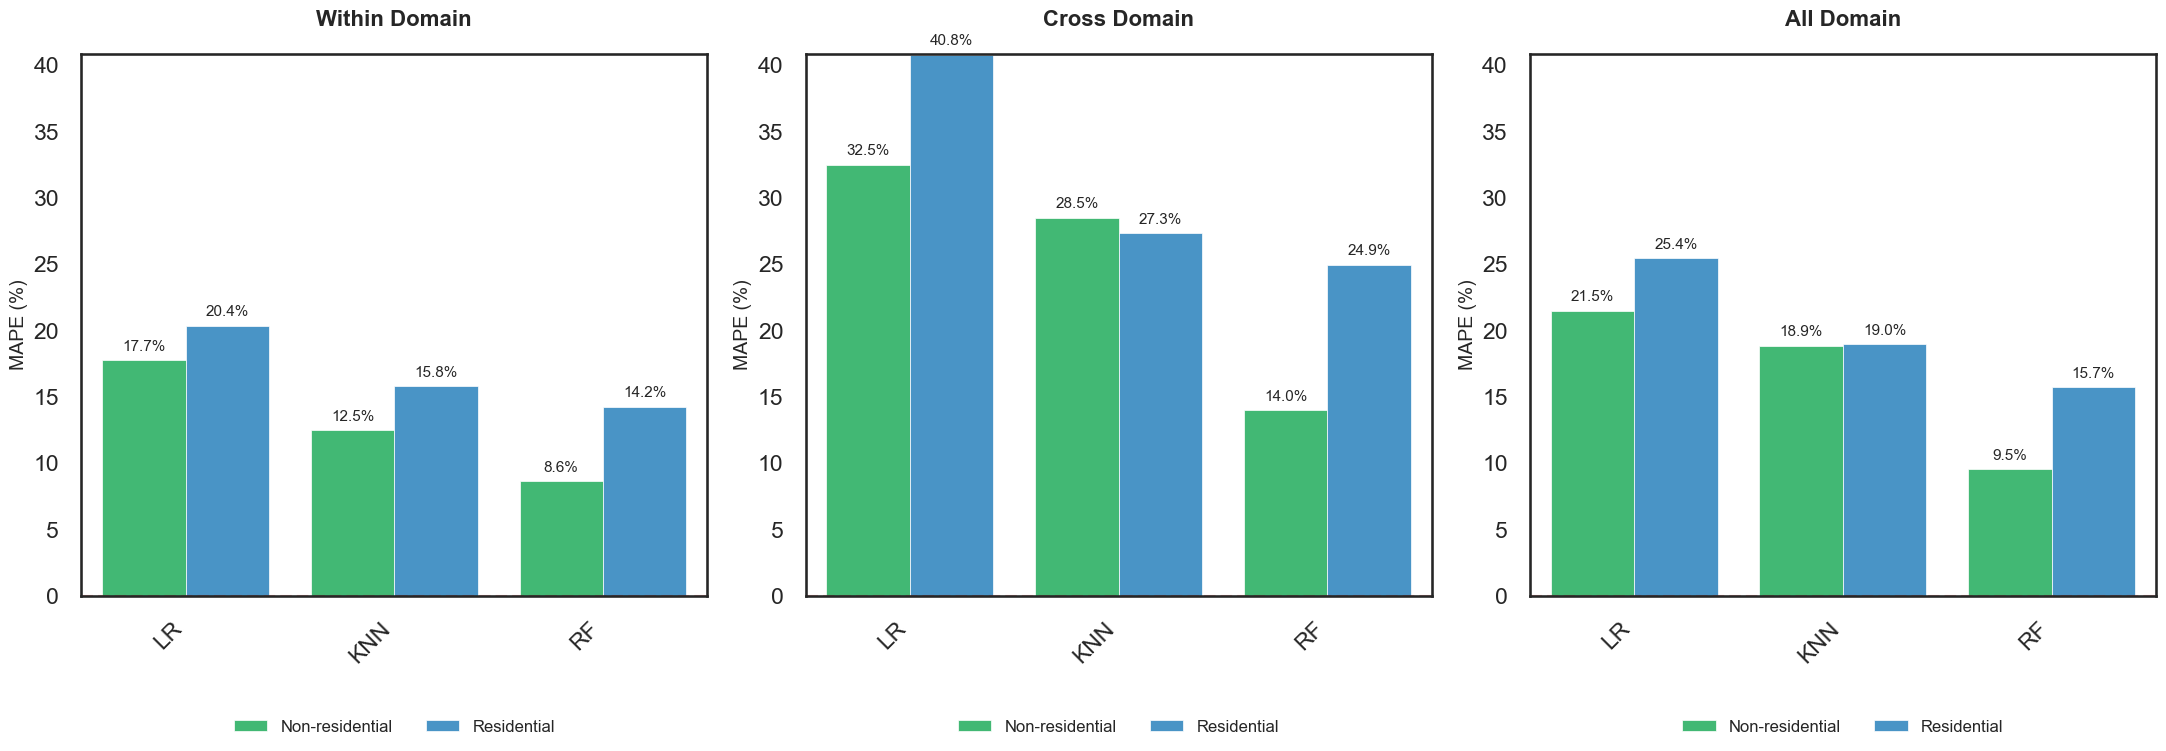

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Establecer el estilo de seaborn para un fondo limpio
sns.set_style("white")  # Esto eliminará el grid y dará un fondo blanco limpio

strategy_names = {
    'within_domain': 'Within Domain',
    'cross_domain': 'Cross Domain',
    'all_domain': 'All Domain'
}

model_names = {
    'LinearRegression': 'LR',
    'KNeighborsRegressor': 'KNN',
    'RandomForestRegressor': 'RF'
}

target_names = {
    'Non-residential EUI (kWh/m2/year)': 'Non-residential',
    'Residential EUI (kWh/m2/year)': 'Residential'
}

custom_palette = {
    'Non-residential': '#2ecc71',
    'Residential': '#3498db'
}

fig, axes = plt.subplots(1, 3, figsize=(22, 8))

strategies = ['within_domain', 'cross_domain', 'all_domain']

# Calculando los límites dinámicos basados en los valores de MAPE
min_mape = filtered_results['MAPE'].min()
max_mape = filtered_results['MAPE'].max()

y_min = min(min_mape - 0.1, 0)
y_max = max(max_mape + 0.1, max_mape)

for ax, strategy in zip(axes, strategies):
    strategy_results = filtered_results[filtered_results['Strategy'] == strategy].copy()
    strategy_results['Model'] = strategy_results['Model'].map(model_names)
    strategy_results['Target'] = strategy_results['Target'].map(target_names)

    # Desactivar el grid para cada subplot
    ax.grid(False)

    bars = sns.barplot(
        data=strategy_results, 
        x='Model', 
        y='MAPE', 
        hue='Target', 
        palette=custom_palette,
        ax=ax,
        linewidth=0.5  # Aquí ajustamos el grosor del borde
    )
    
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%', padding=5, fontsize=11)

    ax.set_title(f'{strategy_names[strategy]}', 
                 fontsize=16,
                 pad=20,
                 fontweight='bold')
    ax.set_ylabel('MAPE (%)', fontsize=14)
    ax.set_xlabel('')  # Eliminar etiqueta del eje X

    ax.set_ylim(y_min, y_max)
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.3)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax.legend(bbox_to_anchor=(0.5, -0.2),
              loc='upper center',
              ncol=2,
              fontsize=12)

plt.tight_layout()
plt.show()
